In [1]:
from SLiCAP import *
import numpy as np

Succesfully self-tested the Maxima command.
SLiCAP Version matches with the latest release of SLiCAP on github.
Running from an Ipython enviroment, importing SLiCAPnotebook.


In [2]:
prj = initProject('Balanced single loop feedback')

In [3]:
htmlPage('Introduction and Requirements')

txt = "For this assignment, we consider a balanced CS stage with single loop feedback. Specifically, we consider a complementary parallel stage, i.e. push-pull stage in terms conventional analog design, with capacitive passive feedback loop."
HTML(text2html(txt));
txt = r"The maximum length of the antenna is $l= 0.5 \text{ m}$. Considering the maximum length, the noise floor is $P_n = 2.5 \times 10^{-17} \times 0.5^2 = 6.25 \times 10^{-18} \text{ (V}^2 / \text{ Hz)}$ Furthermore, the flicker noise $P_{fn} = \frac{10^{-6}}{f} \times l^2 $. The corner frequency is $f_l =200 \text{ kHz}$."
HTML(text2html(txt));
txt = r"The active antenna is loaded with $50\;\Omega$ coaxial cable. Given a 1 dB compression level of 0 dBm at the output of the amplifier. This means an output power of 1 mW. Therefore, the output rms voltage is $V_o= \sqrt{P \cdot R_o} = \sqrt{1\text{ mW} \cdot 50\;\Omega} = 0.2236 \text{ V}$. The output rms current is $I_o = V_o/R_o = 0.2236 \text{ V} / 50\;\Omega = 4.472 \text{ mA}$. From these values we get the peak voltage $V_p = \sqrt{2} \cdot 0.2236 = 316.2 \text{ mV}$ and the peak value of the current is $I_p = 6.324 \text{ mA}$. Since we are using output voltage feedback the output impedance of the amplifier is zero. Therefore, we insert a series resistance of $50\;\Omega$, to obtain an ouput resistance of $50\;\Omega$. This means that the we must double the ouput peak voltage $V_p = 632.4\text{ mV}$, while the ouput current stays the same."
HTML(text2html(txt));
txt = r"The voltage gain of the amplifier is $A_v = V_{out}/V_{in} = Vo_{rms}/(0.45\times 0.5)$. Since we need two times the rms voltage of the CS stage withouut feedback, we get = $A_v = 2 \times 0.2236/(0.45\times 0.5) = 2$."
HTML(text2html(txt));
txt = r"Finally, the intermodulation products in the circuit bandwidth $\text{(10 kHz - 30 MHz)}$, should be less than $-50 \text{ dBm}$."
HTML(text2html(txt));

In [4]:
makeNetlist('CS_noise.asc', 'Noise Analysis')
i1 = instruction();
i1.setCircuit('CS_noise.cir');

C:\Users\Ossama El Boustani\Workspace\Reposititories\Structured_Electronic_Design\Assignment 2 - Design Study\Design Study 4\cir\CS_noise.asc
Warning less than two connections at node: 'out'.
No errors found for circuit: 'Noise Analysis' from file: 'CS_noise.cir'.



In [5]:
HTML(head2html('Circuit Schematic'))
HTML(img2html('CS_noise.svg', 600))

In [6]:
HTML(netlist2html('CS_noise.cir'))

In [7]:
HTML(head2html('Analysis'))

txt = r"For the noise analysis of a complemantary parallel stage we keep the analysis simple by analyzing a CS stage instead. In order to achieve the same noise performance of the CS stage we must halve the width of each transistor and the quiescent operating current. However, since we will be using passive feedback, the noise performance degarades since the feedback capacitor appears as a shunt capacitor at the input."
text2html(txt)
txt = r"To set the gain of the amplifier at 2 we need the feedback capacitor to be twice smaller than the antenna capacitor. The Capacitor of the antenna is $C_A = 8.33 \times 10^{-12} \cdot l  = 8.33 \times 0.5 = 4.2 \text{ pF}$. Therefore, the feedback capacitor is $C_f = 0.5 \times C_A = 2.1\text{ pF}$."
text2html(txt)
txt = r"For the CS stage, we know that we can get the optimum performance when $c_{iss} = C_A + C_F = 6.3 \text{ pF}$. If we operate in the saturation region, we have $WL = c_{iss} \frac{3}{2} \frac{t_{ox}}{\epsilon_o \epsilon_{sio2}} = 1.12 \times 10^{-9}$. And the minimum $g_m$ is $g_m = 10.3 \text{ mS}$. This results $F_T = 270 \text{ MHz}$ and $f_l = 30 \text{ kHz}$. This means that noise requirements are achievable for CS stage."
text2html(txt);
txt = r"We choose $L = 1.6 \;\mu\text{m}$ and $W = 700 \;\mu\text{m}$. And we consider a current $I_D = 10 \text{ mA}$"
text2html(txt);

In [8]:
i1.defPar('L', '1.6u')
i1.defPar('W', '700u')
i1.defPar('ID', '10m')
i1.defPar('IG', '0')
i1.defPar('C_A', '4.2p')
i1.defPar('C_F', '2.1p')

In [9]:
HTML(elementData2html(i1.circuit))

RefDes,Nodes,Refs,Model,Param,Symbolic,Numeric
C1,N002 N001,,C,value,$$C_{A}$$,$$4.2 \cdot 10^{-12}$$
C2,N002 0,,C,value,$$C_{F}$$,$$2.1 \cdot 10^{-12}$$
F1_XU1,N002 0 10_XU1 0,,F,value,$$\frac{s}{2 \pi f_{T XU1}}$$,$$1.733 \cdot 10^{-10} s$$
H1_XU1,N002 out 1_XU1 10_XU1,,H,value,$$\frac{1}{g_{m XU1}}$$,$$23.04$$
I1_XU1,0 1_XU1,,I,value,$$0$$,$$0$$
,,,,noise,$$\frac{4 T k \left(1 + \frac{f_{\ell XU1}}{f}\right)}{R_{N XU1}}$$,$$6.428 \cdot 10^{-22} + \frac{5.992 \cdot 10^{-17}}{f}$$
I2_XU1,N002 0,,I,value,$$0$$,$$0$$
,,,,noise,$$2 IG q$$,$$0$$
V1,N001 0,,V,value,$$0$$,$$0$$
,,,,dc,$$0$$,$$0$$


In [10]:
HTML(params2html(i1.circuit))

Name,Symbolic,Numeric
$$CGBO_{N18}$$,$$1.0 \cdot 10^{-12}$$,$$1.0 \cdot 10^{-12}$$
$$CGSO_{N18}$$,$$3.0 \cdot 10^{-10}$$,$$3.0 \cdot 10^{-10}$$
$$CJB_{0 N18}$$,$$0.001$$,$$0.001$$
$$C_{A}$$,$$4.2 \cdot 10^{-12}$$,$$4.2 \cdot 10^{-12}$$
$$C_{F}$$,$$2.1 \cdot 10^{-12}$$,$$2.1 \cdot 10^{-12}$$
$$C_{OX N18}$$,$$\frac{\epsilon_{0} \epsilon_{SiO2}}{TOX_{N18}}$$,$$0.008422$$
$$E_{CRIT N18}$$,$$5.6 \cdot 10^{6}$$,$$5.6 \cdot 10^{6}$$
$$ID$$,$$0.01$$,$$0.01$$
$$IG$$,$$0$$,$$0$$
$$I_{0 N18}$$,$$2 C_{OX N18} N_{s N18} U_{T}^{2} u_{0 N18}$$,$$6.413 \cdot 10^{-7}$$


In [11]:
tox = i1.getParValue('TOX_N18');
# eps = 3.453e-11;
eps = i1.getParValue('epsilon_0')*i1.getParValue('epsilon_SiO2')
Ca = 6.3e-12 ;
Se = 6.25e-18;
k = i1.getParValue('k');
kf = (i1.getParValue('KF_N18'));
T = 300;

WL = Ca *3*tox/(eps*2)
gm = 16*k*T/(Se)
ft = gm/(2*np.pi*Ca)
fl = kf*np.pi*ft/(3*k*T)
print("WL", WL)
print("gm", gm)
print("ft", ft*1e-6)
print("fl", fl*1e-3)
L = 1.6e-6;
print((WL/L)*1e6)

WL 1.12202446901396e-9
gm 0.0106033806336000
ft 267.869911321002
fl 20.3174603174603
701.265293133725


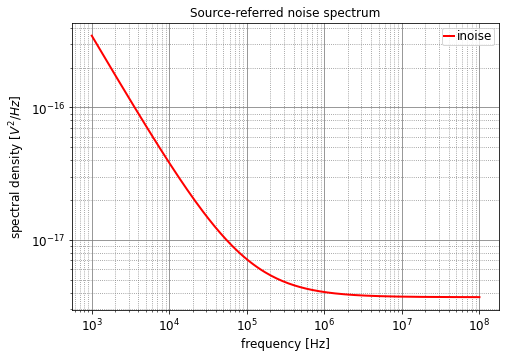

'C:\\Users\\Ossama El Boustani\\Workspace\\Reposititories\\Structured_Electronic_Design\\Assignment 2 - Design Study\\Design Study 4/html/img/Inoise.svg'

In [12]:
i1.setSource('V1')
i1.setDetector('V_out')
i1.setGainType('vi')
i1.setDataType('noise')
i1.setSimType('numeric')
noise_result = i1.execute()
noise2html(noise_result)
fig = plotSweep('Inoise', 'Source-referred noise spectrum', noise_result, 1e3, 1e8, 200, funcType = 'inoise', show=True)
fig2html(fig, 600)

In [13]:
HTML(head2html('Conclusion'))

txt = r"We can conclude that the requirements have been met. The ouput noise power is below the noise floor $6.25 \times 10^{-18} \text{(V}^2 /\text{Hz)}$ and the cutoff frequency is $f_l = 100 \text{ kHz}$. For the push-pull stage the same noise performance can be achieved for half the current and width values."
text2html(txt);

In [14]:
clear()

In [15]:
makeNetlist('push-pull_Slicap.asc', 'Small Signal Dynamic Behaviour')
i1 = instruction();
i1.setCircuit('push-pull_Slicap.cir');

C:\Users\Ossama El Boustani\Workspace\Reposititories\Structured_Electronic_Design\Assignment 2 - Design Study\Design Study 4\cir\push-pull_Slicap.asc
No errors found for circuit: 'Small Signal Dynamic Behaviour' from file: 'push-pull_Slicap.cir'.



In [16]:
HTML(head2html('SLiCAP Circuit diagram'))
HTML(netlist2html('push-pull_Slicap.cir'))
HTML(img2html('push-pull.svg', 600))


In [17]:
HTML(head2html('Introduction'))

txt = r"We choose the same parameters obtained from the noise analysis. $L = 1.6\;\mu\text{m}$. We take halfe the width and the current. For the NMOS device $W_N = 350\;\mu\text{m}$ and we take 4 times higher width for the PMOS device $W_P = 1400 \;\mu\text{m}$. The curent $ID = 5 \text{ mA}$"
text2html(txt);


In [18]:
i1.defPar('L_N', '1.6u')
i1.defPar('L_P', '1.6u')
i1.defPar('W_N', '350u')
i1.defPar('W_P', '1400u')
i1.defPar('ID', '5m')
i1.defPar('C_A', '4.2p')
i1.defPar('C_F', '2.1p')

In [19]:
HTML(head2html('Circuit Data'))
HTML(elementData2html(i1.circuit))


RefDes,Nodes,Refs,Model,Param,Symbolic,Numeric
C1,N001 N003,,C,value,$$C_{A}$$,$$4.2 \cdot 10^{-12}$$
C2,N002 N001,,C,value,$$C_{F}$$,$$2.1 \cdot 10^{-12}$$
Cdb_M1_XU1,N002 0,,C,value,$$c_{db XU1}$$,$$3.15 \cdot 10^{-13}$$
Cdg_M1_XU1,N002 N001,,C,value,$$c_{dg XU1}$$,$$5.25 \cdot 10^{-13}$$
Cgb_M1_XU1,N001 0,,C,value,$$c_{gb XU1}$$,$$2.038 \cdot 10^{-12}$$
Cgs_M1_XU1,N001 0,,C,value,$$c_{gs XU1}$$,$$1.625 \cdot 10^{-11}$$
Csb_M1_XU1,0 0,,C,value,$$c_{sb XU1}$$,$$3.15 \cdot 10^{-13}$$
Gb_M1_XU1,N002 0 0 0,,g,value,$$g_{b XU1}$$,$$0.01455$$
Gm_M1_XU1,N002 0 N001 0,,G,value,$$g_{m XU1}$$,$$0.04157$$
Go_M1_XU1,N002 0 N002 0,,g,value,$$g_{o XU1}$$,$$0.0001562$$


In [20]:
HTML(params2html(i1.circuit))

Name,Symbolic,Numeric
$$CGBO_{N18}$$,$$1.0 \cdot 10^{-12}$$,$$1.0 \cdot 10^{-12}$$
$$CGBO_{P18}$$,$$1.0 \cdot 10^{-12}$$,$$1.0 \cdot 10^{-12}$$
$$CGSO_{N18}$$,$$3.0 \cdot 10^{-10}$$,$$3.0 \cdot 10^{-10}$$
$$CGSO_{P18}$$,$$3.0 \cdot 10^{-10}$$,$$3.0 \cdot 10^{-10}$$
$$CJB_{0 N18}$$,$$0.001$$,$$0.001$$
$$CJB_{0 P18}$$,$$0.001$$,$$0.001$$
$$C_{A}$$,$$4.2 \cdot 10^{-12}$$,$$4.2 \cdot 10^{-12}$$
$$C_{F}$$,$$2.1 \cdot 10^{-12}$$,$$2.1 \cdot 10^{-12}$$
$$C_{OX N18}$$,$$\frac{\epsilon_{0} \epsilon_{SiO2}}{TOX_{N18}}$$,$$0.008422$$
$$C_{OX P18}$$,$$\frac{\epsilon_{0} \epsilon_{SiO2}}{TOX_{P18}}$$,$$0.008422$$


In [21]:
i1.setSimType('numeric');
# i1.setSimType('symbolic');
i1.setGainType('gain');
i1.setDataType('laplace');
i1.setSource('V1');
i1.setDetector('V_out');

In [22]:
gain = i1.execute()


In [23]:
HTML(head2html('Bode plots'))

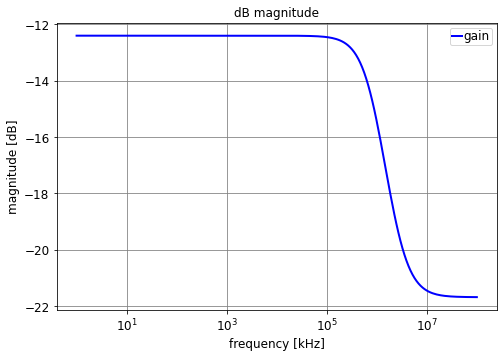

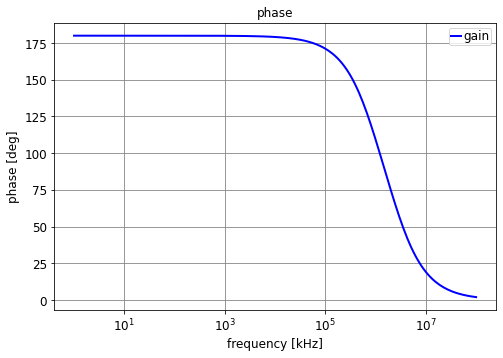

'C:\\Users\\Ossama El Boustani\\Workspace\\Reposititories\\Structured_Electronic_Design\\Assignment 2 - Design Study\\Design Study 4/html/img/phaseZt.svg.svg'

In [24]:
dBmagZt = plotSweep('dBmagZt.svg', 'dB magnitude', gain, 1, 100e6, 200, funcType = 'dBmag', sweepScale = 'k', show=True)
fig2html(dBmagZt, 600)

phaseZt = plotSweep('phaseZt.svg', 'phase', gain, 1, 100e6, 200, funcType = 'phase', sweepScale = 'k', show=True)
fig2html(phaseZt, 600)

In [25]:
HTML(head2html('Loop gain analysis'))
i1.setSimType('numeric');
i1.setGainType('loopgain');
i1.setDataType('pz');
i1.setSource('V1')
i1.setDetector('V_out')
i1.setLGref('Gm_M1_XU1')
result_loopgain = i1.execute()
HTML(pz2html(result_loopgain))

pole,Re [Hz],Im [Hz],Mag [Hz],Q
p1,-6.064e+8,,6.064e+8,
zero,Re [Hz],Im [Hz],Mag [Hz],Q


In [26]:
HTML(head2html('Conclusion'))

txt = r"We can conclude that the loop gain and the bandwidth are very low and therefore the requirements are not met."
text2html(txt);


In [27]:
makeNetlist('push-pull_Slicap.asc', 'Output Drive')
i1 = instruction();
i1.setCircuit('push-pull_Slicap.cir');

C:\Users\Ossama El Boustani\Workspace\Reposititories\Structured_Electronic_Design\Assignment 2 - Design Study\Design Study 4\cir\push-pull_Slicap.asc
No errors found for circuit: 'Output Drive' from file: 'push-pull_Slicap.cir'.



In [28]:
HTML(head2html('Drive capabilities'))

txt = r"We choose the minimum length $L = 180 \text{ nm}$ and we iterate to find the width for which the ouput clips at approximately $350 \text{ mV}$ which is needed for the load. We take the width of the PMOS 4 times higher than the width of the NMOS because the PMOS has lower mobility. We arrived at $W_N = 180\;\mu\text{m}$ and $W_P = 720 \mu m$. From the transient simulation results, we can conclude that the stage satisfies the driving requirements. The output is plotted across the $50 \;\Omega$ load.  "
text2html(txt);


In [29]:
HTML(head2html('LTspice Schematic'))
HTML(img2html('CompParallel.svg', 600))

In [30]:
HTML(head2html('LTspice simulation'))
HTML(img2html('Bias_out.svg', 600))